# ANÁLISIS DESCRIPTIVO

Como se detalla en el README, el objetivo del siguiente análisis es determinar las disparidades regionales dentro de Argentina en la ocurrencia de enfermedades no transmisibles (en particular aquellas relacionadas con el estilo de vida: diabetes, hipertensión y colesterol), para mayor sencillez las denominaremos ENT (enfermedades No transmisibles). Se analizarán disparidades regionales y a partir de esto, las causas de las mismas.  

Se realizarán en esta sección algunos análisis que permitan entender si existen las disparidades por región y si hay alguna otra variable que esté influyendo en los resultados obtenidos y que no corresponda a diparidades regionales sino a una mala obtención de la muestra.

Realizaremos una división general para determinar las variables que se considerarán "posibles causas" y las variables que consideramos "consecuencias". Las consecuencias hace referencia a la aparición de enfermedades

### Variables consideradas CAUSAS

1. caracteristicas_vivienda
2. caracteristicas_hogar
3. ingresos_hogar
4. caracteristicas_encuestado
5. salud_y_af
6. tabaquismo
7. pesocorporal
8. alimentacion
9. consumo_alcohol

### Variables consideradas CONSECUENCIAS

1. hipertension
2. colesterlo
3. diabetes

### Variables ordenadora

El dominio_geografico, y en particular la columna "region" determinarán la división


In [1]:
#importanción de librerías a utilizar

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from colorama import init, Fore, Style

In [2]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

df.head(5)

,id,region,tamanio_aglomerado_2,tamanio_aglomerado_3,tamanio_aglomerado_4,tipo_vivienda_2,tipo_vivienda_3,tipo_vivienda_4,tipo_vivienda_5,tipo_vivienda_6,...,colesterol_alto_99,consumo_regular_riesgo,consumido_alcohol_2,consumido_alcohol_99,dijeron_diabetes,dijeron_diabetes_99,familiares_directos_diabetes_2,familiares_directos_diabetes_99,familiares_no_directos_diabetes_2,familiares_no_directos_diabetes_99
0,1128639,1,0,0,0,0,1,0,0,0,...,0,2.0,0,0,0,0,1,0,1,0
1,1709939,1,0,0,0,0,0,0,0,0,...,0,2.0,0,0,0,0,1,0,1,0
2,6874130,1,0,0,0,0,1,0,0,0,...,0,2.0,0,0,0,0,1,0,1,0
3,10319375,1,0,0,0,0,1,0,0,0,...,0,2.0,0,0,0,0,1,0,0,0
4,11140857,1,0,0,0,0,1,0,0,0,...,0,2.0,0,0,0,0,1,0,0,1


# ANÁLISIS DE OCURRENCIA DE LAS ENT POR REGIÓN



## COLESTEROL POR REGIÓN

In [3]:
#usaremos la variable "region" y la variable "colesterol_alto". Calcularemos porcentaje de colesterol alto en cada region. El porcentaje se calcula como cantidad de '1' respecto al total de '2'

#agrupamos para poder calcular porcentajes de cada situación (NO solo conteo)

###########################################################3

colesterol_si = df[df['colesterol_alto'] == 1]   #filtro solo valores 1 que corresponde a colesterol alto


colesterol_no = df[df['colesterol_alto'] == 0]    #filtro solo valores 2 que corresponde a colesterol normal

#suma_colesterol_si = colesterol_si.groupby('region')['colesterol_alto'].sum()     #sumo total
#suma_colesterol_no = colesterol_no.groupby('region')['colesterol_alto'].sum()     #sumo total

suma_colesterol_si = colesterol_si.groupby('region').size()     #sumo total
suma_colesterol_no = colesterol_no.groupby('region').size()     #sumo total


print(f'Total de personas con colesterol por región: {suma_colesterol_si}\n')
print(f'Total de personas sin colesterol por región: {suma_colesterol_no}')

Total de personas con colesterol por región: region
1     837
2    1840
3    1037
4     673
5     577
6     812
dtype: int64

Total de personas sin colesterol por región: region
1    2400
2    6444
3    3620
4    2846
5    1776
6    2775
dtype: int64


In [4]:
#dado que las sumas totales por región son dispares calcularemos el porcentaje de personas con colesterol alto para poder comparar


colesterol_si_prom = (suma_colesterol_si * 100)/(suma_colesterol_si + suma_colesterol_no)  #calculo porcentaje de alto sobre el total 

colesterol_si_prom = colesterol_si_prom.round(2)   #limito a 2 decimales la salida

print(f'promedio de personas con colesterol por región: {colesterol_si_prom}')



promedio de personas con colesterol por región: region
1    25.86
2    22.21
3    22.27
4    19.12
5    24.52
6    22.64
dtype: float64


In [5]:
dfc = colesterol_si_prom.reset_index()

dfc.columns = ['region', 'Porcentaje_colesterol_alto']

print(dfc)

   region  Porcentaje_colesterol_alto
0       1                       25.86
1       2                       22.21
2       3                       22.27
3       4                       19.12
4       5                       24.52
5       6                       22.64


## HIPERTENSIÓN POR REGIÓN

In [6]:


hipertension_si = df[df['veces_presion_alta']==1]   #filtro solo valores 2 que corresponde a hipertension 1 vez + hipertensión + de 1 vez

hipertension_no = df[df['veces_presion_alta']==0]    #filtro solo valores 3 que corresponde no presion alta

suma_hipertension_si = hipertension_si.groupby('region').size()     #sumo total


suma_hipertension_no = hipertension_no.groupby('region').size()     #sumo total

print(f"personas con al menos 1 vez presión alta: {suma_hipertension_si}\n")

print(f"personas sin presión alta: {suma_hipertension_no}\n")

personas con al menos 1 vez presión alta: region
1    1063
2    3035
3    1430
4    1393
5     888
6    1236
dtype: int64

personas sin presión alta: region
1    2174
2    5249
3    3227
4    2126
5    1465
6    2351
dtype: int64



In [7]:
#promedios

hipertension_si_prom = (suma_hipertension_si  * 100)/(suma_hipertension_si + suma_hipertension_no)  #calculo porcentaje de alto sobre el total 

hipertension_si_prom = hipertension_si_prom.round(2)   #limito a 2 decimales la salida

print(hipertension_si_prom)

region
1    32.84
2    36.64
3    30.71
4    39.59
5    37.74
6    34.46
dtype: float64


In [8]:
dfh = hipertension_si_prom.reset_index()

dfh.columns = ['region', 'Porcentaje_hipertension']

print(dfh)

   region  Porcentaje_hipertension
0       1                    32.84
1       2                    36.64
2       3                    30.71
3       4                    39.59
4       5                    37.74
5       6                    34.46


## DIABETES POR REGIÓN

In [9]:

diabetes_si = df[df['dijeron_diabetes']==1]   #filtro solo valores 1 que corresponde a diabetes
diabetes_no = df[df['dijeron_diabetes']==0]    #filtro solo valores 2 que corresponde a no diabetes

suma_diabetes_si = diabetes_si.groupby('region').size()     #sumo total

suma_diabetes_no = diabetes_no.groupby('region').size()     #sumo total

print(suma_diabetes_si)
print(suma_diabetes_no)

region
1     395
2    1155
3     596
4     430
5     349
6     533
dtype: int64
region
1    2842
2    7129
3    4061
4    3089
5    2004
6    3054
dtype: int64


In [10]:
#promedios


diabetes_si_prom = (suma_diabetes_si * 100)/(suma_diabetes_si + suma_diabetes_no)  #calculo porcentaje de alto sobre el total 

diabetes_si_prom = diabetes_si_prom.round(2)   #limito a 2 decimales la salida

print(diabetes_si_prom)


region
1    12.20
2    13.94
3    12.80
4    12.22
5    14.83
6    14.86
dtype: float64


In [11]:
dfd = diabetes_si_prom.reset_index()

dfd.columns = ['region', 'Porcentaje_diabetes']

print(dfd)

   region  Porcentaje_diabetes
0       1                12.20
1       2                13.94
2       3                12.80
3       4                12.22
4       5                14.83
5       6                14.86


## UNIMOS COLUMNAS

In [12]:
df2 = dfc.merge(dfh, on= 'region', how='outer' ).merge(dfd, on= 'region', how='outer')  
df2

,region,Porcentaje_colesterol_alto,Porcentaje_hipertension,Porcentaje_diabetes
0,1,25.86,32.84,12.20
1,2,22.21,36.64,13.94
2,3,22.27,30.71,12.80
3,4,19.12,39.59,12.22
4,5,24.52,37.74,14.83
5,6,22.64,34.46,14.86


In [13]:
#nombramos la regiones 

region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}
df2['region'] = df2['region'].map(region_dict)

print(df2)

          region  Porcentaje_colesterol_alto  Porcentaje_hipertension  \
0  Metropolitana                       25.86                    32.84   
1       Pampeana                       22.21                    36.64   
2       Noroeste                       22.27                    30.71   
3        Noreste                       19.12                    39.59   
4           Cuyo                       24.52                    37.74   
5     Patagónica                       22.64                    34.46   

   Porcentaje_diabetes  
0                12.20  
1                13.94  
2                12.80  
3                12.22  
4                14.83  
5                14.86  



###  <u> PORCENTAJE DE PERSONAS CON COLESTEROL ALTO, HIPERTENSIÓN Y DIABETES POR REGIÓN </u> 
 


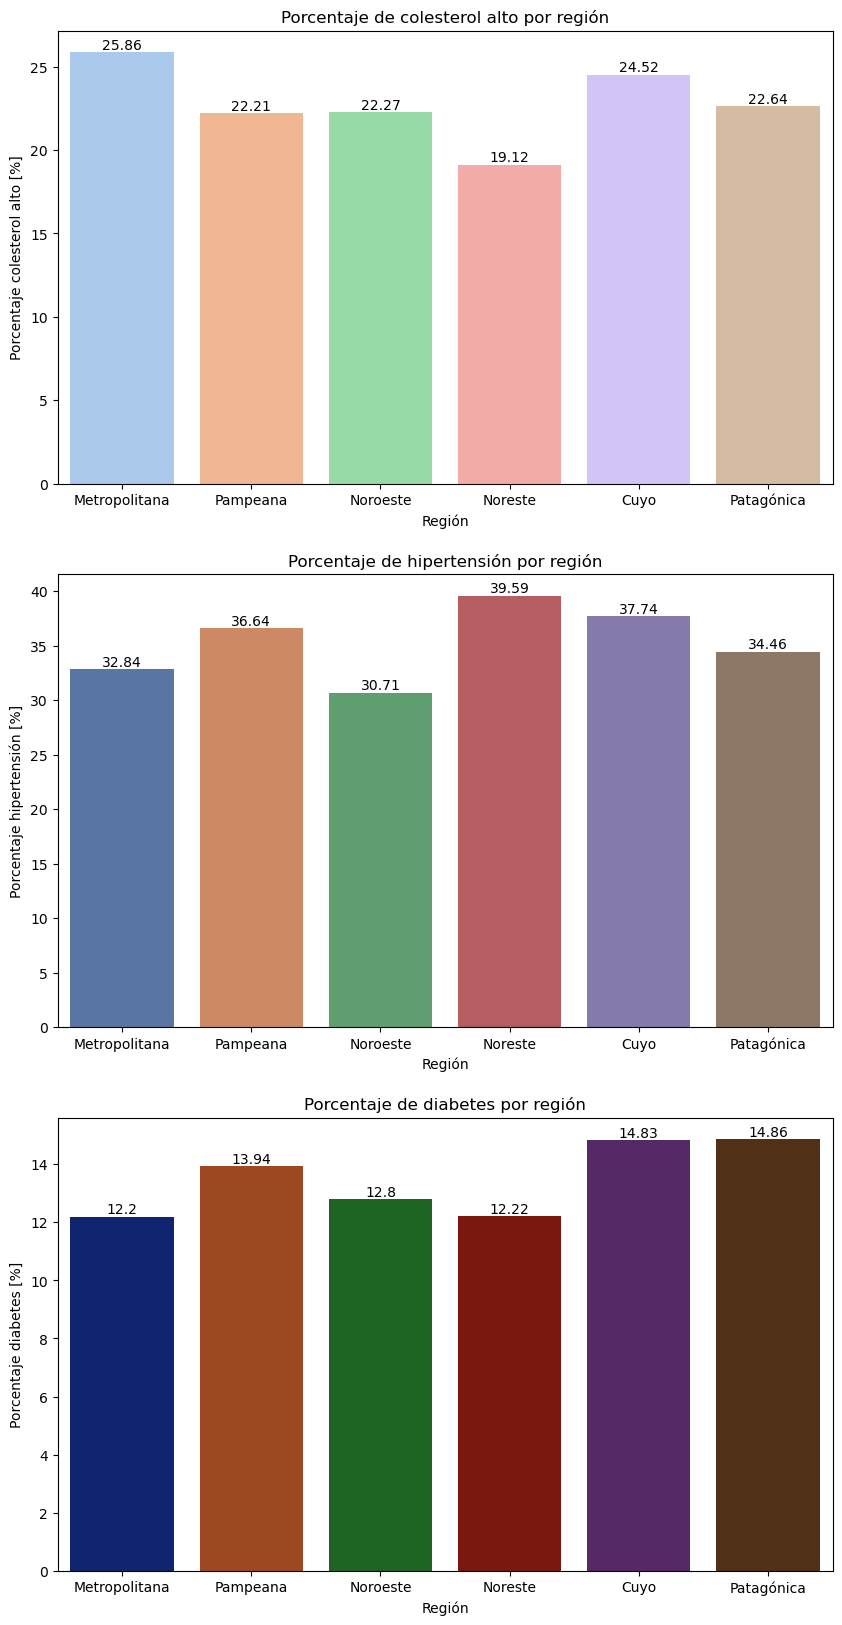

In [14]:

plt.figure(figsize=(10, 20))

# Gráfico 1: Comparación de colesterol alto por región
plt.subplot(3, 1, 1)
sns.barplot(data=df2, x='region', y='Porcentaje_colesterol_alto', palette='pastel')
plt.title('Porcentaje de colesterol alto por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje colesterol alto [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


# Gráfico 2: Comparación de hipertensión por región
plt.subplot(3, 1, 2)
sns.barplot(data=df2, x='region', y='Porcentaje_hipertension', palette='deep')
plt.title('Porcentaje de hipertensión por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje hipertensión [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


# Gráfico 3: Comparación de diabetes por región
plt.subplot(3, 1, 3)
sns.barplot(data=df2, x='region', y='Porcentaje_diabetes', palette='dark')
plt.title('Porcentaje de diabetes por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje diabetes [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


#plt.tight_layout()  # Ajustar espaciado entre los subplots
plt.show()

## Conclusión de los gráficos


1. Se observa que hay mayor ocurrencia de hipertensión, luego de colesterol y por último la enfermedad menos común es la diabetes en todas las regiones.
2. La diferencia entre el mayor y menor porcentaje en cada enfermedad son: COLESTEROL: 6.74%, HIPERTENSIÓN: 8.88% Y DIABETES: 2.66%.

## DISTRIBUCIÓN DE EDADES POR REGIÓN


Analizaremos si luego de realizar el drop de algunas filas siguen estando balanceadas la cantidad de hombres vs mujeres y el promedio de edad se mantiene similar por region

In [15]:
#hacemos un subdataset

df3 = df[['region', 'edad', 'sexo_2']]

In [16]:
#nombramos la regiones 

region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}
df3['region'] = df3['region'].map(region_dict)



#sexo_dict = {
#    1: 'Varon',
#    2: 'Mujer'
#}
#df3['sexo'] = df3['sexo'].map(sexo_dict)

print(df3)

              region      edad  sexo_2
0      Metropolitana -0.802608       0
1      Metropolitana  1.025393       1
2      Metropolitana -0.747214       1
3      Metropolitana  0.969999       1
4      Metropolitana -1.245760       0
...              ...       ...     ...
25632     Patagónica -1.134972       1
25633     Patagónica  0.859211       0
25634     Patagónica  1.523939       1
25635     Patagónica -0.137880       1
25636     Patagónica -0.359456       1

[25637 rows x 3 columns]


In [17]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler =joblib.load('scaler.pkl')
df3['edad']= scaler.inverse_transform(df3[['edad']])

print(df3)

              region  edad  sexo_2
0      Metropolitana  32.0       0
1      Metropolitana  65.0       1
2      Metropolitana  33.0       1
3      Metropolitana  64.0       1
4      Metropolitana  24.0       0
...              ...   ...     ...
25632     Patagónica  26.0       1
25633     Patagónica  62.0       0
25634     Patagónica  74.0       1
25635     Patagónica  44.0       1
25636     Patagónica  40.0       1

[25637 rows x 3 columns]


In [18]:
df3['edad']= df3['edad'].astype(int)

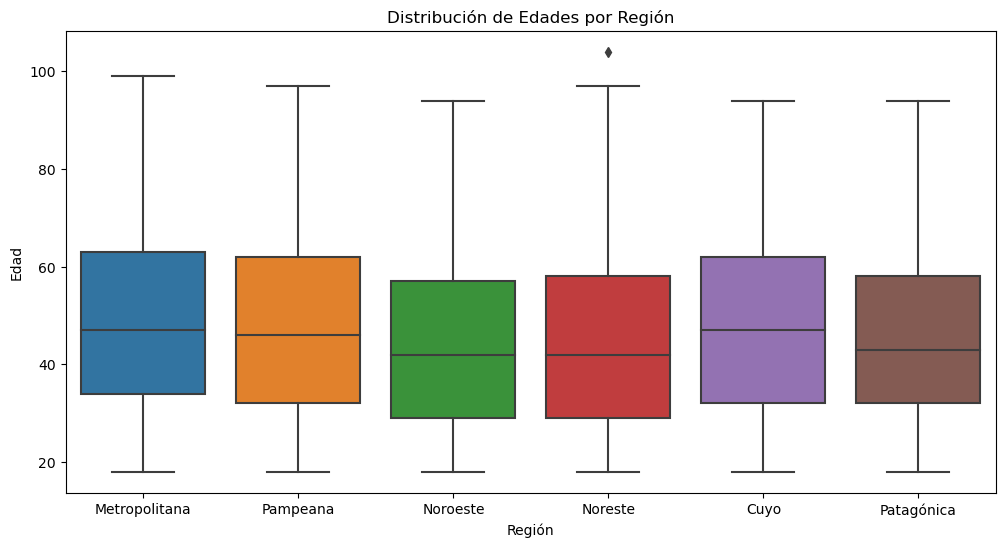

In [19]:
# boxplot para edades por región
plt.figure(figsize=(12, 6))
sns.boxplot(x=df3['region'], y=df3['edad'], data=df3)

plt.title('Distribución de Edades por Región')
plt.xlabel('Región')
plt.ylabel('Edad')
plt.show()

In [20]:

mediana_region = df3.groupby('region')['edad'].median()
print(mediana_region)

region
Cuyo             47
Metropolitana    47
Noreste          42
Noroeste         42
Pampeana         46
Patagónica       43
Name: edad, dtype: int32


## DISTRIBUCIÓN DE SEXO POR REGIÓN

sexo_2            0     1
region                   
Cuyo            989  1364
Metropolitana  1427  1810
Noreste        1512  2007
Noroeste       2088  2569
Pampeana       3632  4652
Patagónica     1574  2013


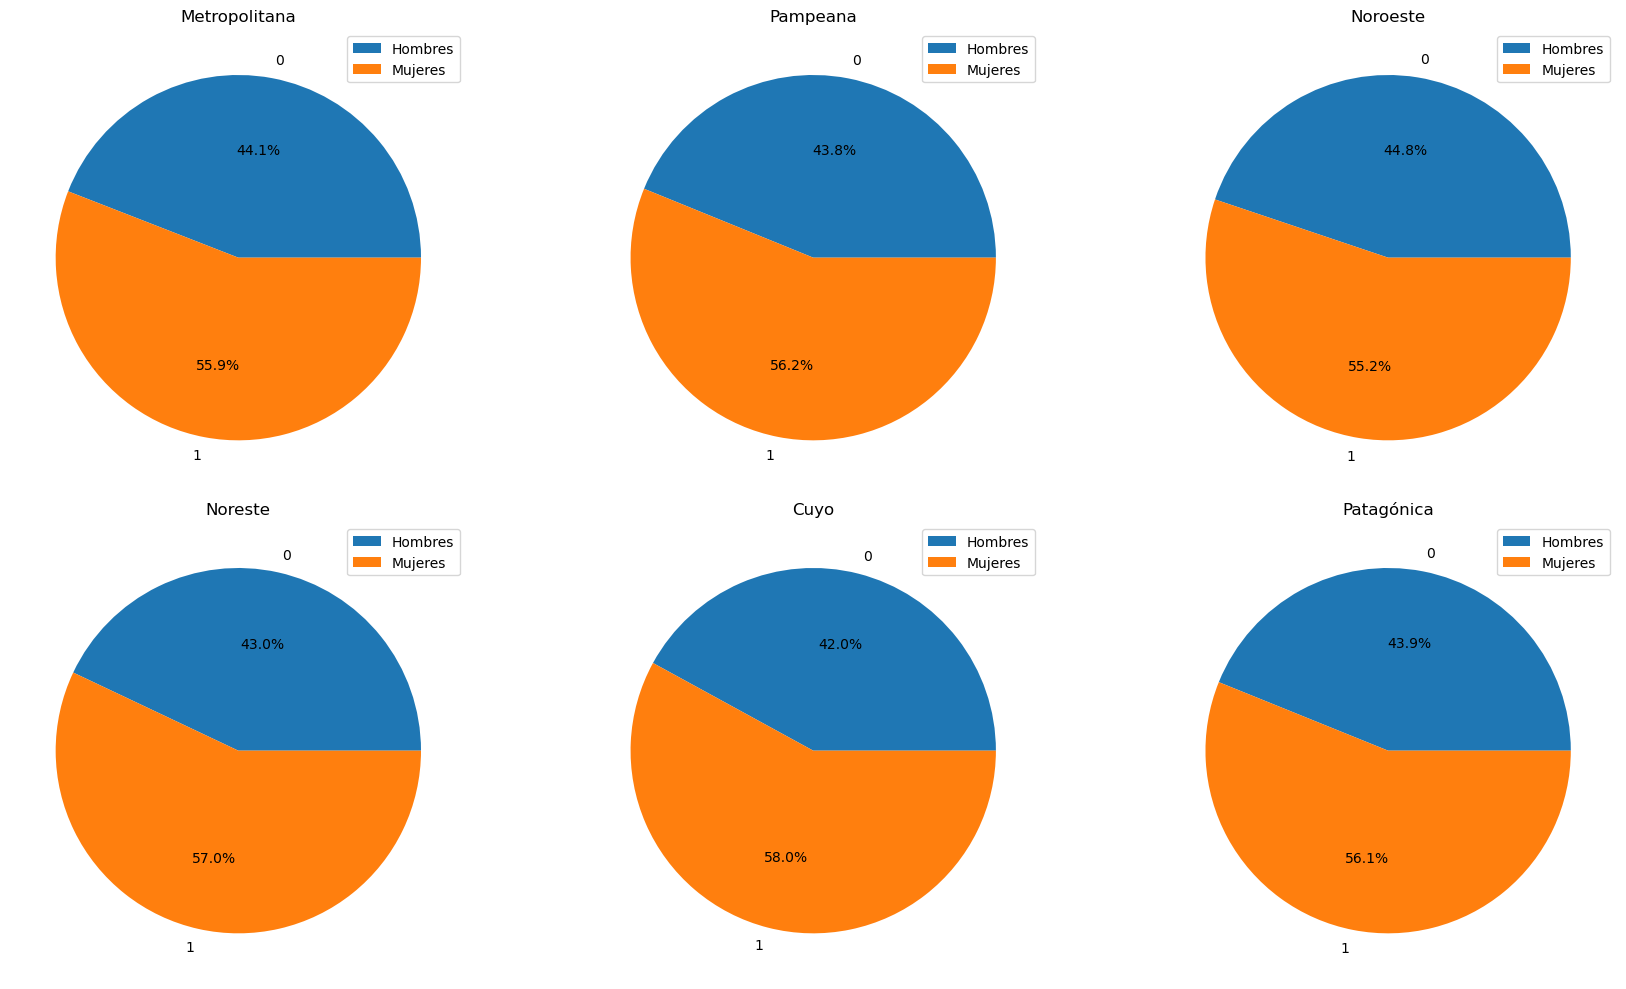

In [21]:
#agrupamos para el grafico por sexos 
conteo_sexo_region = df3.groupby(['region', 'sexo_2']).size().unstack()
print(conteo_sexo_region)


conteo_sexo_region.rename(columns={'1': 'Hombres', '2': 'Mujeres'}, inplace=True)

orden_regiones = ['Metropolitana', 'Pampeana', 'Noroeste', 'Noreste', 'Cuyo', 'Patagónica']


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, region in enumerate(orden_regiones):
    ax = axs.flatten()[i]
    conteo_sexo_region.loc[region].plot(kind='pie', ax=ax, autopct='%1.1f%%')    
    ax.set_title(region)
    ax.set_ylabel('')
    ax.legend(['Hombres', 'Mujeres'], loc='upper right')

plt.tight_layout()
plt.show()




## DISTRIBUCIÓN DE EDADES POR SEXO y POR REGIÓN

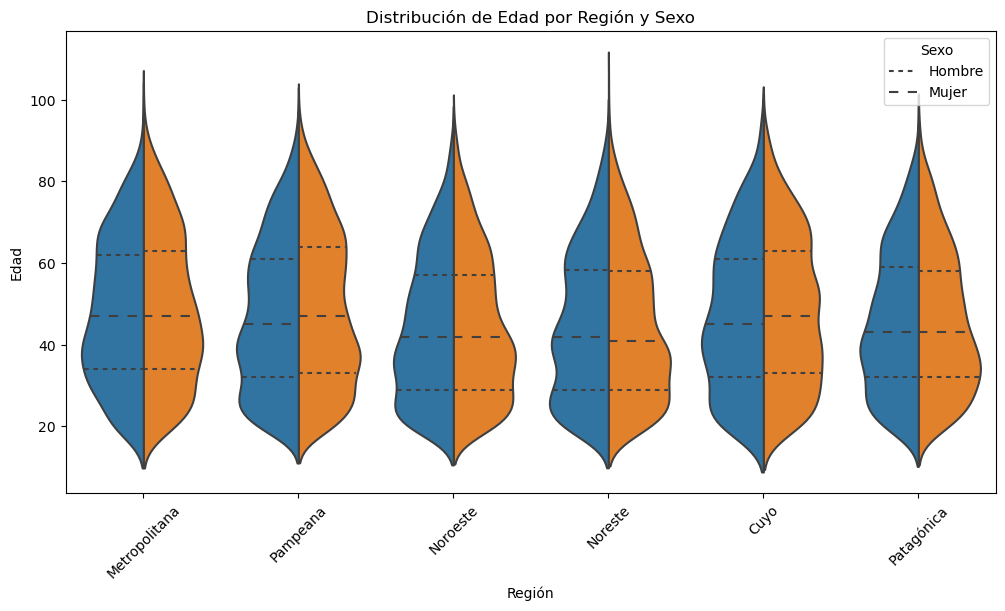

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df3['region'], y=df3['edad'], hue=df3['sexo_2'], data=df3, split=True, inner="quart")
plt.title('Distribución de Edad por Región y Sexo')
plt.xlabel('Región')
plt.ylabel('Edad')
plt.legend(title='Sexo', loc='upper right', labels=['Hombre', 'Mujer'])
plt.xticks(rotation=45)
plt.show()


## Conclusiones de los gráficos por edad y por sexo


Dado que la población analizada en cada región se encuentra dividida en 50% aproximadamente y No se observan grandes diferencias porcentuales entre las edades de los grupos poblacionales ni entre sexos, se considera que los resultados del análisis serán lo suficientemente generales

# Contaremos las filas resultantes por región

In [23]:
regionx = df3.groupby('region').size()
print(regionx)

region
Cuyo             2353
Metropolitana    3237
Noreste          3519
Noroeste         4657
Pampeana         8284
Patagónica       3587
dtype: int64
